In [1]:
from fastai.vision import *
# from fastai.datasets import *
# from fastai.imports import *

In [2]:
path = Config.data_path()/'planet'

In [3]:
pd.read_csv(path/'train_v2.csv').head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [5]:
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
      .split_by_rand_pct()
      .label_from_df(label_delim=' '))

In [6]:
data = (src.transform(tfms, size=128)
       .databunch().normalize(imagenet_stats))

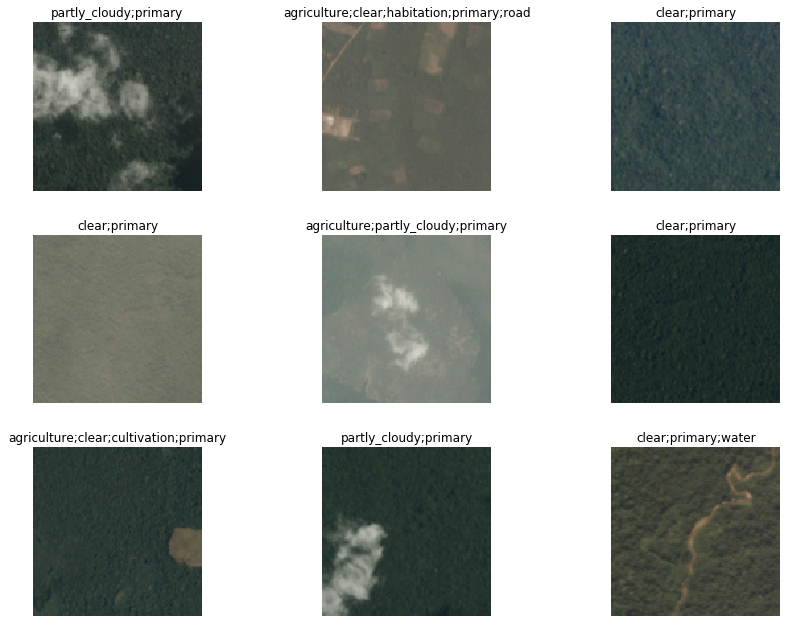

In [7]:
data.show_batch(rows=3, figsize=(12, 9))

In [8]:
arch = models.resnet34

In [9]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [10]:
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


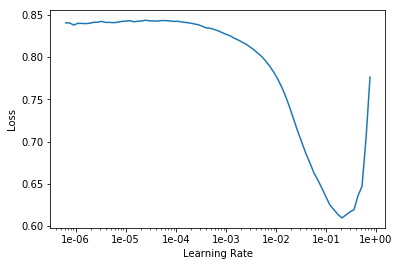

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
lr = 0.01

In [ ]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.134201,0.110975,0.942899,0.900919,02:00
1,0.115044,0.099461,0.955485,0.914478,01:32
2,0.105102,0.092160,0.954830,0.920926,01:32


In [ ]:
learn.save('stage-1-rn34')

In [ ]:
learn.unfreeze()

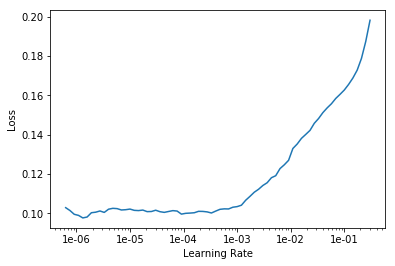

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099465,0.091791,0.953668,0.921281,02:05
1,0.101182,0.089299,0.954925,0.922903,02:06
2,0.095111,0.086394,0.956066,0.924249,02:06
3,0.085676,0.083899,0.958159,0.927568,02:06
4,0.082278,0.082926,0.958631,0.926952,02:06


In [25]:
learn.save('stage-2-rn34')

In [26]:
data = (src.transform(tfms, size=256)
       .databunch().normalize(imagenet_stats))
learn.data = data

In [27]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


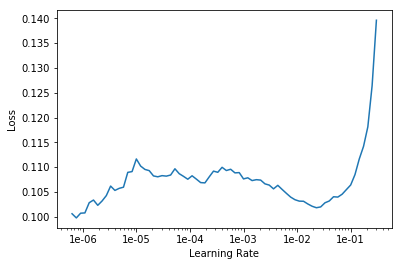

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
lr = 1e-2/2

In [30]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.091654,0.083660,0.953987,0.927528,04:29
1,0.090355,0.082389,0.960150,0.928463,04:28
2,0.086981,0.082944,0.961298,0.928007,04:28
3,0.084077,0.080814,0.959844,0.929712,04:28
4,0.085936,0.080279,0.960368,0.930055,04:28


In [31]:
learn.save('stage-1-256-rn50')

In [32]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.087805,0.082020,0.956654,0.928092,06:19
1,0.089397,0.083602,0.957599,0.927984,06:18
2,0.087545,0.081075,0.959757,0.928907,06:18
3,0.078947,0.079960,0.960593,0.930371,06:17


In [ ]:
learn.save('stage-2-256-rn34')

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.export()